In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf

import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px


import seaborn as sns
sns.set(style = "whitegrid", 
        color_codes = True,
        font_scale = 1.5)
import os
import re

In [2]:
# we are working with different file systems (apple vs windows) so we need to automatically
# generate path to data on the local machine.

notebook_wd = os.getcwd()
project_folder = re.match(r'(.*)[\\|\/]analysis', notebook_wd)
full_path = project_folder.group(1)

if os.name =='nt':
    data_path = '\\data\\'
else:
    data_path ='/data/'

full_path+data_path

'/Users/zachmcrae/Documents/GitHub/DC200_GradProj/data/'

In [3]:
df = pd.read_csv(full_path+data_path+'plant_pollinator_diversity_set1.csv')
#plant_pollinator_2 = pd.read_csv('data/plant_pollinator_diversity_set2.csv')

In [4]:
# Create temperature in farenheit
df['temp_f'] = df['TEMP']* 1.8000 + 32.00
# Temperature falls within normal bounds 
df['temp_f'].describe()

# Create date time values for the dataset
df['DATETIME'] = pd.to_datetime(df['SAMPLEDATE'])

df['Date'] = pd.to_datetime(df['SAMPLEDATE'], format='%Y-%m-%d')

df['MY'] = df['DATETIME'].dt.to_period('M')
# Create a month and year variable 
df['month'] = df['DATETIME'].dt.month



### Estimation 

An evaluation of the report based on the Data Science Lifecycle (10 points, 2 points per component). The review should include at least one strong point and one suggestion for improvement for each of the following components in the project:

    Data collection and sampling
    Data cleaning
    Exploratory data analysis (including data wrangling and visualization)
    Data modeling (including feature engineering, selection of the model, and evaluation of the model’s performance)
    Inference (do the results from the model sufficiently support the conclusion within the report?)

# Data Sampling and Collection

## How were the data collected?

Our group is utilizing the `plant_pollinator_diversity_set1.csv` that contains ecological data collected from a long-term observation study from 2011 to 2018 that focuses on plant-pollinator interaction and its impact on local biodiversity. The data is from an annual collection of plant-pollinator interaction data from 15 minute plot watches in Montane Meadows in Oregon. The data was collected through June to September of each year. Thus, data from late-fall to spring is unavailable for each year. 

Sampling plots, along with other tools like transects and point method, are tools used for field observations to collect ecological data. The goal is to get unbiased samples of a sufficient quantity that statistical analyses will be sounder.

An ecologist made observations for 15 minutes at one specific plot indicated by the the `PLOT_ID` in addition to other plots on that same day. The chronological period in which a survey took place is indicated by the `WATCH` variable. Various weather conditions were reported such as `CLOUDS`, `WIND`, and `TEMP` during the observations. Pollinator, plant and interaction (`PLTSP_NAME`, `VISSP_NAME`, `NO_INT`) data are also observation-based variables. Thus, the data was collected exclusively by human observations in a given 15 min window during the months of June and September from 2011 to 2018.

## Was there any potential bias introduced in the sampling process?

1. Biologist/Ecologist Fatigue: The observer may have less precision in accurately documenting all the potential plants and pollinators for an extended period of time. Therefore, observations that occured later in the day might have less accurate data.
2. Biologist/Ecologist Accuracy: The biologist/ecologist who took these samples may have not been as well trained as others. Also, reliance on senior staff may also hinder correct identification. For example, a more junior researcher may have to consult a supervisor if that researcher is unable to determine the species. The supervisor may or may not consult a field guide and depend on touch, feel and personal knowledge to identify a particular species. This may lead to misidentification and misrepresentation of the data. 
3. Human Error: Similar to what was stated above, human error can occur in misidentification as well as other observation processes. In the instance of collecting the temperature data, a third of the observation have null values. Thus, some of the data wasn't collected based on the inability for the Biologist/Ecologist to determine the correct value (i.e. temperature).
4. The data does not encompass the spring season. Thus, there are interactions that are not recorded during that time.

# Data Dictionary 

## `CLOUDS`

1. S = Sunny
2. SH = Shade
3. PC = Partly Cloudy
4. C = Cloudy

## `WIND`

1. BR = Breezy
2. ST = Still

## `MINUTE`

On a given sample date, an observer will be there for 15 minutes, which is why the numbers in this variable are from 1-15

## `PLOT_ID`

Plot ID for a plot in a given meadow. There are 180 individual plots.

## `PLOT`

Plots in a given meadow. They are numbered 1-10. There are 180 individual plots.

## `WATCH`

* Code	
    * Definition
* 0.5	
    * Phenological period 0.5 (The cone peak complex was sampled an extra time in 2011 during the first week 0.5, 1.5 were used)	
* 1	
    * Phenological period 1	
* 1.5	
    * Phenological period 1.5 (The cone peak complex was sampled an extra time in 2011 during the first week 0.5, 1.5 were used)	
* 2	
    * Phenological period 2	
* 3	
    * Phenological period 3	
* 4	
    * Phenological period 4	
* 5	
    * Phenological period 5	
* 6	
    * Phenological period 6	
* 7	
    * Phenological period 7

## Observations 

1. Dataset covers years 2011-2018
2. Plant Pollinators 1 is the number of pollinator interactions with flowers in the area. 

# Data Cleaning

## What type of data are you currently exploring?

We are currently exploring the `plant_pollinator_diversity_set1.csv` which contains ecological data collected from a long-term observation study from 2011 to 2018 that focuses on plant-pollinator interaction and its impact on local biodiversity. We joined this data with weather station data that collected average temperature and precipitation from three weather stations that surround the forest (H. J. Andrews Experimental Forest)

## What is the granularity of the data?

VERY. Just kidding. Each observation is a "minute" in a 15-minute time window where a researcher is collecting the total number of pollinator-plant interactions within a particular plot of land, within a meadow within a complex (general region in the forest).  

## What does the distribution of the data look like? 

### Are there any outliers? 

In [5]:
### Look for outliers in the data
df.describe()

ENTITY          YEAR         WATCH          PLOT    START_TIME  \
count  74131.0  74131.000000  74131.000000  74131.000000  63281.000000   
mean       1.0   2014.650214      2.899293      5.417949   1207.213666   
std        0.0      2.386329      1.382982      2.887788    179.136644   
min        1.0   2011.000000      0.500000      1.000000    825.000000   
25%        1.0   2013.000000      2.000000      3.000000   1050.000000   
50%        1.0   2015.000000      3.000000      5.000000   1157.000000   
75%        1.0   2017.000000      4.000000      8.000000   1328.000000   
max        1.0   2018.000000      7.000000     10.000000   1848.000000   

          END_TIME        MINUTE          TEMP    PPI_STATUS        NO_INT  \
count  7501.000000  73978.000000  46439.000000  74131.000000  74078.000000   
mean   1226.535795      7.163008     23.727191      0.813034      2.661154   
std     158.411665      4.560885      4.662489      0.389887      4.175597   
min     918.000000      1.000000     10.000000      0.000000      0.000000   
25%    1110.000000      3.000000     20.000000      1.000000      1.000000   
50%    1216.000000      7.000000     24.000000      1.000000      1.000000   
75%    1336.000000     11.000000     27.000000      1.000000      3.000000   
max    1631.000000     15.000000     44.000000      1.000000    225.000000   

           VISSP_NO        temp_f         month  
count  74131.000000  46439.000000  74131.000000  
mean       1.719901     74.708943      7.069607  
std        2.181709      8.392481      0.580854  
min        1.000000     50.000000      6.000000  
25%        1.000000     68.000000      7.000000  
50%        1.000000     75.200000      7.000000  
75%        2.000000     80.600000      7.000000  
max       35.000000    111.200000      9.000000

#### Potential Outliers 
`NO_INT`: 225 is way too many interactions to count within a minute. We will drop these values

`VISSP_NO`:  35 is mentioned directly in the data dictionary so I think it is better to keep!

`temp_f`: 111 degrees farenheit is the hottest it has ever been in Oregon so we will drop that value as well

In [6]:
# drop high number of interactions data
df.drop(df.loc[df['NO_INT']>=225].index,inplace=True)
# drop high temperature days
df.drop(df.loc[df['temp_f']>=110].index,inplace=True)

### Are there any missing or invalid entries?

## Missing or invalid entries 

There are a total of 74,131 observations in our data. The highest number of missing values comes from the `QC_NOTES` column, which has 68743 null values. The following table outlines which variables have missing values and how important they are to our project's mission.

Column Name  | # of Missing Entries| Importance 
------------- | -------------| -------------|
OBSERVER  | 11,786| Medium |
START_TIME  | 10,850| Low|
END_TIME | 66,630 | Low|
MINUTE | 153 | Low |
CLOUDS | 394 | Medium | 
WIND | 271 | Medium |
TEMP | 27,692 | High | 
NO_INT | 53 | Medium| 
PLTSP_CODE | 13,860 | Med|
PLTSP_NAME | 13,860 | Med|
VISSP_CODE | 13,860 | Med|
VISSP_NAME | 13,860 | Med|
VISSP_TYPE | 35,537 | Low| 
REF_NO | 58,956 | Low | 
QC_NOTES | 68,743 | Low|

### Why `PLTSP_CODE`, `PLTSP_NAME`, `VISSP_CODE`, `VISSP_NAME`, and `VISSP_TYPE` are missing data

Each one of these variables describe the type of plant (PLTSP = Plant species) and insect/pollinator (Visitor Species) that were seen in one of the interactions. 

One peculiar instance is that the `VISSP_NO` variable all came out to 1 even though there are no plant species or visitor species identified. We are going to remove these data from the dataset to remove any outliers, however, this takes out a very large chunk from out sample. Not only is the total removed come out to being ~19% of our data, but it removes over 60% of the observations from 2014, 70% for 2015, and 25% of the data from 2016 as seen in the histogram below. The month of July contains most of the values form this distribution with 9,731 of the 13,860, which is also 20% of the data from the month of July.

We can also use the `PPI_STATUS` variable to use as a proxy that tells us that there were no plant-pollinator interactions caught during those observation minutes.



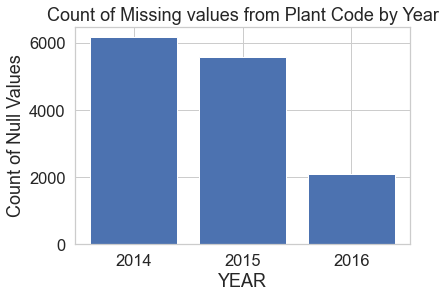

In [7]:
plt.bar(df.loc[df['PLTSP_CODE'].isna(),'YEAR'].value_counts().index,
        df.loc[df['PLTSP_CODE'].isna(),'YEAR'].value_counts())
plt.xlabel('YEAR')
plt.ylabel('Count of Null Values')
plt.title('Count of Missing values from Plant Code by Year');

Distribution of missing data by month


7    9730
6    2187
8    1942
Name: month, dtype: int64

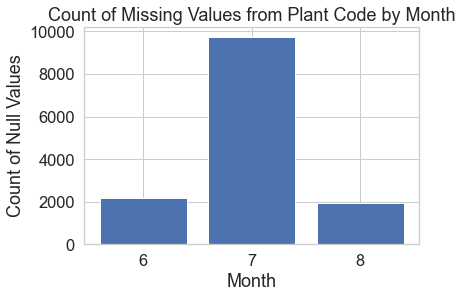

In [8]:
# show the observations that will be gone from each month
plt.bar(df.loc[df['PLTSP_CODE'].isna(),'month'].value_counts().index,
        df.loc[df['PLTSP_CODE'].isna(),'month'].value_counts())
plt.xlabel('Month')
plt.ylabel('Count of Null Values')
plt.title('Count of Missing Values from Plant Code by Month');

print("Distribution of missing data by month")
display(df.loc[df['PLTSP_CODE'].isna(),'month'].value_counts())

In [9]:
# Plant-Pollinator Status indicating missing plant species along with 
# whether or not a plant-pollinator interaction was perceived
df.loc[df['PLTSP_CODE'].isna(),'PPI_STATUS'].value_counts()

0    13859
Name: PPI_STATUS, dtype: int64

In [10]:
# Drop the missing values from the entire dataset 
df.drop(df.loc[df['PLTSP_CODE'].isna()].index,inplace=True)

### Invalid Entries

From our search of the rest of the variables there did not appear to be any outliers in the data. 

In [11]:
# values in clouds are fine based on the data dictionary
df['CLOUDS'].value_counts()
# Replace the values so that we can read them when we use them as a categorical variable
#df['CLOUDS'].replace({'S':'sunny','PC':'p_cloudy','SH':'shade','C':'cloudy'},inplace=True)

S     54151
PC     2727
SH     2009
C      1182
Name: CLOUDS, dtype: int64

In [12]:
df['WIND'].unique()

array(['ST', 'BR', nan], dtype=object)

In [13]:
# Complex values are fine based on the data dictionary
df['COMPLEX'].value_counts()

Frissell      26291
Lookout       15199
Carpenter     12040
Bunchgrass     3470
Cone           3270
Name: COMPLEX, dtype: int64

In [14]:
# MEADOW values are fine based on the data dictionary
df['MEADOW'].value_counts()

M2     11271
RP1     6594
LM      4675
NE      4285
LO      4225
RP2     4141
LS      4091
CPB     3929
CPM     3772
CPS     2684
LB      2208
CNM     1818
CPR     1655
BH      1534
BD      1380
CNT     1018
BS       556
CNE      434
Name: MEADOW, dtype: int64

In [15]:
# YEAR values are fine based on the data dictionary
df['YEAR'].value_counts()

2018    12219
2011    10275
2017     9507
2012     8185
2013     6565
2016     5935
2014     4672
2015     2912
Name: YEAR, dtype: int64

# Exploratory Data Analysis

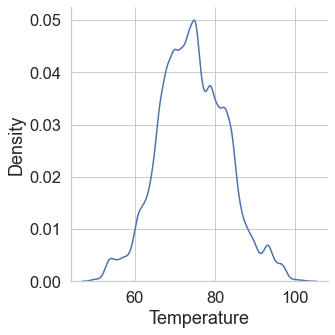

In [16]:
# seems almost normally distributed with a slight right skew
sns.displot(df['temp_f'],kind='kde')
plt.xlabel('Temperature');

In [17]:
#result['PLOT'] = result['PLOT'].astype(str)
# create the result table by grouping by year, then month, then plot of land
result = df[['YEAR','month', 'COMPLEX', 'VISSP_NAME']].groupby(['YEAR','month', 'COMPLEX']).count()
result = result.reset_index()
result.replace({'Bunchgrass':1,'Carpenter':2,'Cone':3,'Frissell':4,'Lookout':5},inplace=True)


fig = px.bar(result, x="COMPLEX", y="VISSP_NAME",  barmode="group",color='COMPLEX',
             facet_row="month", facet_col="YEAR",
             category_orders={"month": [6,7,8,9]}
            )
fig.update_traces()
fig.show()

In [18]:
#result['PLOT'] = result['PLOT'].astype(str)
# create the result table by grouping by year, then month, then plot of land
result = df[['YEAR','month', 'COMPLEX', 'temp_f']].groupby(['YEAR','month', 'COMPLEX']).agg({'temp_f':np.mean})
result = result.reset_index()
result.replace({'Bunchgrass':1,'Carpenter':2,'Cone':3,'Frissell':4,'Lookout':5},inplace=True)


fig = px.bar(result, x="COMPLEX", y="temp_f",  barmode="group",color='COMPLEX',
             facet_row="month", facet_col="YEAR",
             category_orders={"month": [6,7,8,9]}
            )
fig.update_traces()
fig.show()

## Is there any correlation between the variables you are interested in exploring?

In [19]:
df.corr()

ENTITY      YEAR     WATCH      PLOT  START_TIME  END_TIME  \
ENTITY         NaN       NaN       NaN       NaN         NaN       NaN   
YEAR           NaN  1.000000 -0.060329  0.001374   -0.091916 -0.087789   
WATCH          NaN -0.060329  1.000000  0.015341   -0.279953 -0.096199   
PLOT           NaN  0.001374  0.015341  1.000000    0.011397  0.025089   
START_TIME     NaN -0.091916 -0.279953  0.011397    1.000000  0.985246   
END_TIME       NaN -0.087789 -0.096199  0.025089    0.985246  1.000000   
MINUTE         NaN  0.332528 -0.033345  0.008046   -0.020794  0.007580   
TEMP           NaN -0.379052  0.184579  0.029932    0.112541  0.359014   
PPI_STATUS     NaN       NaN       NaN       NaN         NaN       NaN   
NO_INT         NaN  0.001748 -0.027160  0.073057    0.000419  0.038142   
VISSP_NO       NaN -0.087289  0.014171 -0.015979    0.008532  0.074107   
temp_f         NaN -0.379052  0.184579  0.029932    0.112541  0.359014   
month          NaN -0.511674  0.637464  0.013077   -0.192418  0.003588   

              MINUTE      TEMP  PPI_STATUS    NO_INT  VISSP_NO    temp_f  \
ENTITY           NaN       NaN         NaN       NaN       NaN       NaN   
YEAR        0.332528 -0.379052         NaN  0.001748 -0.087289 -0.379052   
WATCH      -0.033345  0.184579         NaN -0.027160  0.014171  0.184579   
PLOT        0.008046  0.029932         NaN  0.073057 -0.015979  0.029932   
START_TIME -0.020794  0.112541         NaN  0.000419  0.008532  0.112541   
END_TIME    0.007580  0.359014         NaN  0.038142  0.074107  0.359014   
MINUTE      1.000000  0.009317         NaN -0.009363 -0.118123  0.009317   
TEMP        0.009317  1.000000         NaN  0.057850 -0.057258  1.000000   
PPI_STATUS       NaN       NaN         NaN       NaN       NaN       NaN   
NO_INT     -0.009363  0.057850         NaN  1.000000  0.215656  0.057850   
VISSP_NO   -0.118123 -0.057258         NaN  0.215656  1.000000 -0.057258   
temp_f      0.009317  1.000000         NaN  0.057850 -0.057258  1.000000   
month      -0.213294  0.152207         NaN -0.031897  0.054071  0.152207   

               month  
ENTITY           NaN  
YEAR       -0.511674  
WATCH       0.637464  
PLOT        0.013077  
START_TIME -0.192418  
END_TIME    0.003588  
MINUTE     -0.213294  
TEMP        0.152207  
PPI_STATUS       NaN  
NO_INT     -0.031897  
VISSP_NO    0.054071  
temp_f      0.152207  
month       1.000000

## Correlations 

Our data shows that there is a weak correlation with temperature (`temp_f` and `NO_INT`)  and number of interactions (and when we explore this topic later, the correlation becomes stronger by removing a few outliers.)

All of the other variables are related to one another (E.g. Start time and End time, PPI_Status (whether or not interactions were seen) and Number of interactions, etc.) We find that this are the only variables that we can generate any meaningful model from. 

<AxesSubplot:xlabel='NO_INT', ylabel='WATCH'>

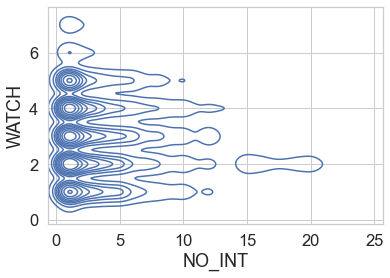

In [20]:
watch_plot= df.loc[df['NO_INT']<25]
sns.kdeplot(x=watch_plot['NO_INT'],y=watch_plot['WATCH'])

## How would you cleanly and accurately visualize the relationship among variables?


Text(0.5, 1.0, 'P-P Interactions Grouped by Day')

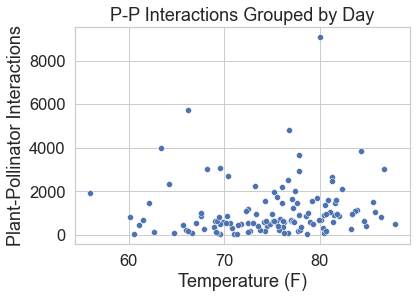

In [21]:
temp_count = df.groupby('SAMPLEDATE').agg({'NO_INT':np.sum,'temp_f':np.mean}).reset_index().dropna()
temp_count = temp_count.loc[:,['NO_INT','temp_f']]
sns.scatterplot(x=temp_count['temp_f'],y=temp_count['NO_INT'])
plt.xlabel('Temperature (F)')
plt.ylabel('Plant-Pollinator Interactions')
plt.title('P-P Interactions Grouped by Day')

In [22]:
temp_count.describe([.25,.75,.8,.85,.9,.95])

NO_INT      temp_f
count   127.000000  127.000000
mean   1091.165354   74.893784
std    1239.942489    6.427700
min      18.000000   56.002791
25%     409.500000   70.367485
50%     656.000000   75.707042
75%    1447.500000   79.794355
80%    1577.000000   80.569224
85%    1979.200000   81.320608
90%    2472.200000   82.176933
95%    3071.500000   84.541033
max    9092.000000   87.848214

Based on the distribution of this data, int might be better to reduce the total observations to being anything below 2500 plant-pollinator interactions. However, this reduces the size of our data substantially, which has other implications for the strength of the model, but still important nonetheless! 

Text(0.5, 1.0, 'Fig 4: P-P Interactions Grouped by Day')

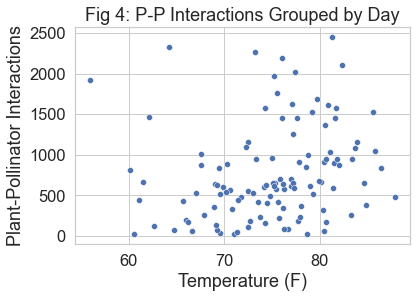

In [23]:
temp_count = df.groupby('SAMPLEDATE').agg({'NO_INT':np.sum,'temp_f':np.mean}).reset_index().dropna()
temp_count = temp_count.loc[temp_count['NO_INT']<=2500]
sns.scatterplot(x=temp_count['temp_f'],y=temp_count['NO_INT'])
plt.xlabel('Temperature (F)')
plt.ylabel('Plant-Pollinator Interactions')
plt.title('Fig 4: P-P Interactions Grouped by Day')

In [24]:
jitter_def =np.random.normal(0, 0.2, size = (len(df)))

Text(0.5, 1.0, 'Fig 3: P-P Interactions by Minute')

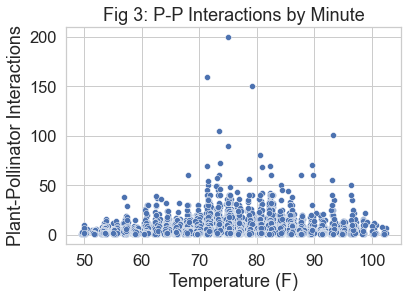

In [25]:
sns.scatterplot(x=df['temp_f']+ jitter_def,
                y=df['NO_INT']+jitter_def)
plt.xlabel('Temperature (F)')
plt.ylabel('Plant-Pollinator Interactions')
plt.title('Fig 3: P-P Interactions by Minute')

<AxesSubplot:xlabel='temp_f', ylabel='NO_INT'>

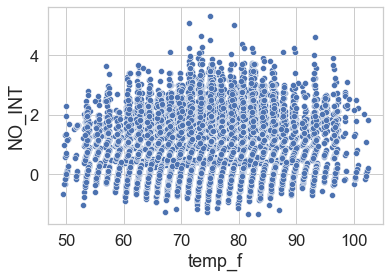

In [26]:
sns.scatterplot(x=df['temp_f']+ jitter_def,
                y=np.log(df['NO_INT']+jitter_def))

In [27]:
temp_count.corr()

NO_INT    temp_f
NO_INT  1.000000  0.194091
temp_f  0.194091  1.000000

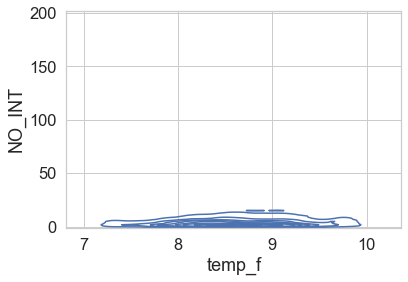

In [28]:
plot = df.loc[:,'NO_INT']
sns.kdeplot(x=df['temp_f']**.5,
                y=df['NO_INT']);

## Wind and Clouds

Text(0, 0.5, 'Count of Interactions')

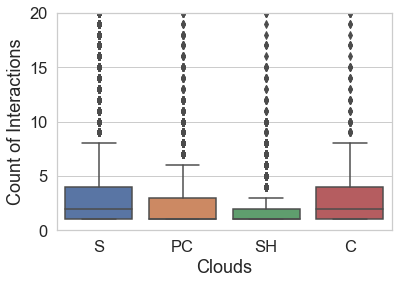

In [29]:
# Draw a nested boxplot to show bills by day and time
sns.boxplot(x=df["CLOUDS"], y=df["NO_INT"])
plt.ylim((0,20))
plt.xlabel('Clouds')
plt.ylabel('Count of Interactions')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60270 entries, 0 to 74130
Data columns (total 31 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   DBCODE      60270 non-null  object        
 1   ENTITY      60270 non-null  int64         
 2   COMPLEX     60270 non-null  object        
 3   MEADOW      60270 non-null  object        
 4   PLOT_ID     60270 non-null  object        
 5   YEAR        60270 non-null  int64         
 6   SAMPLEDATE  60270 non-null  object        
 7   WATCH       60270 non-null  float64       
 8   OBSERVER    48559 non-null  object        
 9   PLOT        60270 non-null  int64         
 10  START_TIME  49867 non-null  float64       
 11  END_TIME    7030 non-null   float64       
 12  MINUTE      60252 non-null  float64       
 13  CLOUDS      60069 non-null  object        
 14  WIND        60164 non-null  object        
 15  TEMP        35505 non-null  float64       
 16  PPI_STATUS  60270 non-

Text(0, 0.5, 'Count of Interactions')

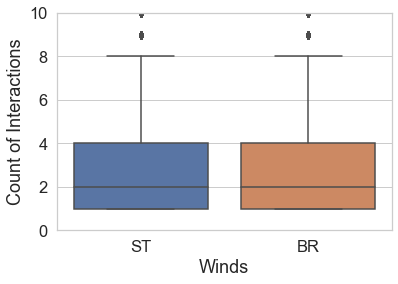

In [31]:
sns.boxplot(x=df["WIND"], y=df["NO_INT"])
plt.ylim((0,10))
plt.xlabel('Winds')
plt.ylabel('Count of Interactions')

## Feature Engineering

Based on our EDA, we believe that we can create the following features for our model to better predict plant-pollinator interactions: 

1. sun_dv: Based on the `CLOUDS` variable, this gives an indicator variable 1 if it was sunny out, and 0 if there was no sun.

2. wind_dv: Based on the `WIND` variable, this gives an indicator variable 1 if it was windy/breezy and 0 if there was no wind.

3. Finding alternate temperature temperature data to fill missing values: Because there are ~27,000 missing values, we want to see how closely we can predict temperatures taken thorough 

## Create Dummy Variables

In [32]:
# Create sunny dummy variables 
from sklearn.preprocessing import OneHotEncoder

def ohe_categorical(data,col):
    """
    One-hot-encodes roof material.  New columns are of the form 0x_QUALITY.
    data (dataframe): pass the series into the function call
    
    data: dataframe 
    col(str): Column passed to isolate data
    
    """
    data = data.copy()
    # create small dataframe to pass into one-hot encoder
    column = data[[col]]
    # create encoder object
    enc = OneHotEncoder()
    # fit the encoder to the data we want to encode
    enc.fit(column)
    # create a dummies dataframe to join
    dummies = pd.DataFrame(enc.transform(column).todense(),
                           columns=enc.get_feature_names(),
                           index=data.index
                          )
    # return join of data with new dummy variables
    return data.join(dummies)

In [33]:
# Create clouds dummy variables
df = ohe_categorical(df,'CLOUDS')

In [34]:
# Drop partly cloudy, cloudy, shade, and null values columns 
df.drop(['x0_PC', 'x0_C' ,'x0_SH', 'x0_nan'],axis=1,inplace=True)
# Keep only the dummy variable that shows sun
df.rename(columns={'x0_S':'sunny_dv'},inplace=True)

In [35]:
# Create wind dummy variables
df = ohe_categorical(df,'WIND')

In [36]:
# Drop still wind and null value columns 
df.drop(['x0_BR', 'x0_nan'],axis=1,inplace=True)
# Keep only the dummy variable that shows it was not a windy day
df.rename(columns={'x0_ST':'wind_dv'},inplace=True)

In [37]:
# Create phenological period dummy variables
df = ohe_categorical(df,'WATCH')

In [38]:
# Keep only the dummy variable that shows phenological periods
df.rename(columns={'x0_0.5':'phen_pt5','x0_1.0':'phen_1','x0_2.0':'phen_2','x0_3.0':'phen_3','x0_4.0':'phen_4',
                  'x0_5.0':'phen_5','x0_6.0':'phen_6','x0_7.0':'phen_7'},inplace=True)

In [39]:
df['bee_dv'] = np.where((df['VISSP_NAME']=='Apis mellifera'),1,0)

# Fill in missing temperature values

In [40]:
# create stations variable for the stations within a 10-mile radius of 
# the observation site
stations = ['USS0022E07S','USS0022E10S','USS0022E11S','USS0021E07S']
# create empty temperature dataframe
temp_df = pd.DataFrame()

# fill in temperatures dataframe
for station in stations:
    fname = full_path+data_path+station+'.csv.gz'  
    df_temp = pd.read_csv(fname, names=["ID", "DATE", "ELEMENT", "VALUE", "FLAG1", "FLAG2", "FLAG3", "FLAG4"])
    temp_df = temp_df.append(df_temp, ignore_index=True)
    
# pivot temperatures dataframe 
temp_df = temp_df.pivot(index=["ID", "DATE"], columns=["ELEMENT"],values="VALUE")
# reset index
temp_df.reset_index(inplace=True)

In [41]:
#convert everything to useful numbers and dates
temp_df['id']= temp_df['ID']
temp_df['date'] = pd.to_datetime(temp_df['DATE'], format='%Y%m%d', errors='ignore')
temp_df['precipitation_mm'] = temp_df['PRCP']/10
temp_df['snow_depth_mm'] = temp_df['SNWD']
temp_df['temp_avg_c'] = temp_df['TAVG']/10
temp_df['temp_min_c'] = temp_df['TMIN']/10
temp_df['temp_max_c'] = temp_df['TMAX']/10
temp_df['temp_obs_c'] = temp_df['TOBS']/10
temp_df['water_snow_mm'] = temp_df['WESD']/10


In [42]:
temp_df = temp_df[['id','date','temp_avg_c', 'precipitation_mm']].copy()
temp_df.head()  

ELEMENT           id       date  temp_avg_c  precipitation_mm
0        USS0021E07S 1980-07-09         NaN               NaN
1        USS0021E07S 1980-07-10         NaN               NaN
2        USS0021E07S 1980-07-11         NaN               NaN
3        USS0021E07S 1980-07-12         NaN               NaN
4        USS0021E07S 1980-07-13         NaN               NaN

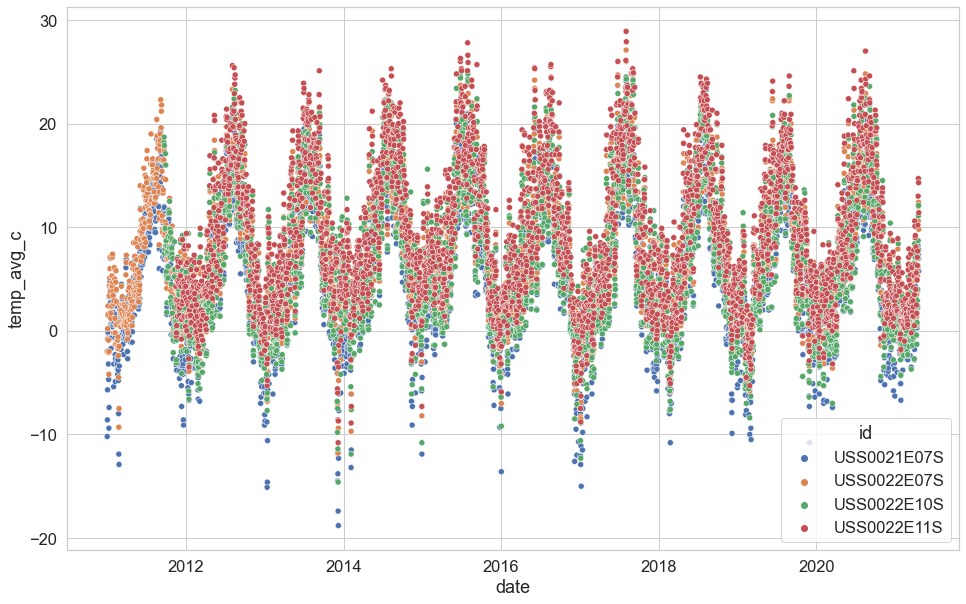

In [43]:
date = pd.to_datetime('20110101', format='%Y%m%d', errors='ignore')

plt.figure(figsize=(16, 10))
sns.scatterplot(data=temp_df[temp_df['date']>date], x = 'date', y ='temp_avg_c', hue = 'id');

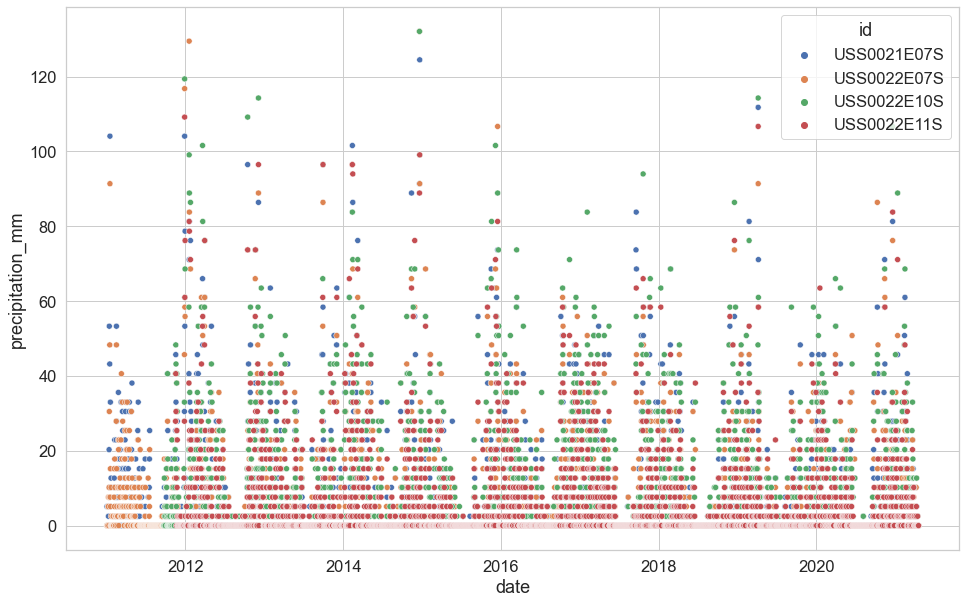

In [44]:
plt.figure(figsize=(16, 10))
sns.scatterplot(data=temp_df[temp_df['date']>date], x = 'date', y ='precipitation_mm', hue = 'id');

Now this is effectively an exercise in overplotting. We should find out what the difference from average yearly rainfall is for each of these weather stations is. 

In [45]:
avg_rain = temp_df['precipitation_mm'].mean()
std_rain = temp_df['precipitation_mm'].std()

print(avg_rain)
print(std_rain)

plot_range=np.arange(0,51,0.1)
distnormal = stats.norm.pdf(plot_range, loc=avg_rain, scale=std_rain)
distlognormal = stats.pearson3.pdf(plot_range,skew=1,loc=avg_rain, scale=std_rain)

6.4223561599306525
12.368610153099697


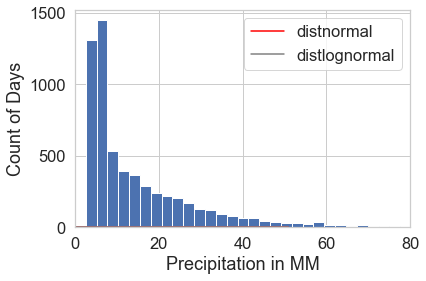

In [46]:
plt.hist(temp_df.loc[(temp_df['date']>date)&temp_df['precipitation_mm']>0]['precipitation_mm'],bins=50)
plt.plot(plot_range,distnormal, color='red', label='distnormal')
plt.plot(plot_range,distlognormal, color='grey', label='distlognormal')
plt.xlim(0,80)
plt.xlabel('Precipitation in MM')
plt.ylabel('Count of Days')
plt.legend(loc='upper right');

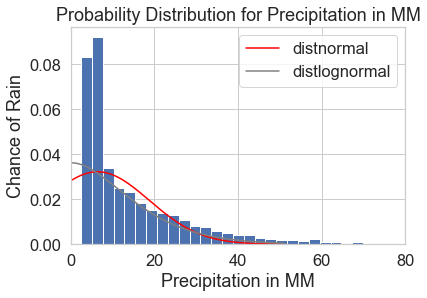

In [47]:
plt.hist(temp_df.loc[(temp_df['date']>date)&temp_df['precipitation_mm']>0]['precipitation_mm'],bins=50,
        density=True)
plt.plot(plot_range,distnormal, color='red', label='distnormal')
plt.plot(plot_range,distlognormal, color='grey', label='distlognormal')
plt.xlim(0,80)
plt.xlabel('Precipitation in MM')
plt.ylabel('Chance of Rain')
plt.title("Probability Distribution for Precipitation in MM")
plt.legend(loc='upper right');

What I want to do now is reformat the data so that the stations are individual columns, and their average temperatures are values that correspond to a given day. We can then try to merge the two datasets and see what the difference in measured temperatures look like

In [48]:
temp_df['quarter_yr'] = temp_df['date'].dt.to_period('Q')

In [49]:
temp_df.head()

ELEMENT           id       date  temp_avg_c  precipitation_mm quarter_yr
0        USS0021E07S 1980-07-09         NaN               NaN     1980Q3
1        USS0021E07S 1980-07-10         NaN               NaN     1980Q3
2        USS0021E07S 1980-07-11         NaN               NaN     1980Q3
3        USS0021E07S 1980-07-12         NaN               NaN     1980Q3
4        USS0021E07S 1980-07-13         NaN               NaN     1980Q3

In [50]:
temp_df.groupby(['quarter_yr','id'])[['precipitation_mm']].agg(np.sum)

ELEMENT                 precipitation_mm
quarter_yr id                           
1978Q3     USS0022E07S               0.0
1978Q4     USS0022E07S             571.4
1979Q1     USS0022E07S             764.7
1979Q2     USS0022E07S             383.2
1979Q3     USS0022E07S             108.7
...                                  ...
2021Q1     USS0022E11S             748.5
2021Q2     USS0021E07S              20.3
           USS0022E07S              17.7
           USS0022E10S              32.9
           USS0022E11S              12.6

[413 rows x 1 columns]

In [51]:
temp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37054 entries, 0 to 37053
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                37054 non-null  object        
 1   date              37054 non-null  datetime64[ns]
 2   temp_avg_c        31560 non-null  float64       
 3   precipitation_mm  36916 non-null  float64       
 4   quarter_yr        37054 non-null  period[Q-DEC] 
dtypes: datetime64[ns](1), float64(2), object(1), period[Q-DEC](1)
memory usage: 1.4+ MB


In [52]:
temp_df['quarter'] = temp_df['quarter_yr'].astype(str).str.split('Q',expand=True)[1]
temp_df['year']=  temp_df['quarter_yr'].astype(str).str.split('Q',expand=True)[0]

In [53]:
temp_df['quarter']

0        3
1        3
2        3
3        3
4        3
        ..
37049    2
37050    2
37051    2
37052    2
37053    2
Name: quarter, Length: 37054, dtype: object

In [54]:
temp_df

ELEMENT           id       date  temp_avg_c  precipitation_mm quarter_yr  \
0        USS0021E07S 1980-07-09         NaN               NaN     1980Q3   
1        USS0021E07S 1980-07-10         NaN               NaN     1980Q3   
2        USS0021E07S 1980-07-11         NaN               NaN     1980Q3   
3        USS0021E07S 1980-07-12         NaN               NaN     1980Q3   
4        USS0021E07S 1980-07-13         NaN               NaN     1980Q3   
...              ...        ...         ...               ...        ...   
37049    USS0022E11S 2021-04-15        10.2               2.5     2021Q2   
37050    USS0022E11S 2021-04-16        13.0               0.0     2021Q2   
37051    USS0022E11S 2021-04-17        14.7               0.0     2021Q2   
37052    USS0022E11S 2021-04-18        14.3               0.0     2021Q2   
37053    USS0022E11S 2021-04-19        11.4               0.0     2021Q2   

ELEMENT quarter  year  
0             3  1980  
1             3  1980  
2             3  1980  
3             3  1980  
4             3  1980  
...         ...   ...  
37049         2  2021  
37050         2  2021  
37051         2  2021  
37052         2  2021  
37053         2  2021  

[37054 rows x 7 columns]

In [55]:
quart_rain =  temp_df.groupby(['year','quarter']).agg({'precipitation_mm':np.sum}).reset_index()

avg_sp_rainfall = np.mean(quart_rain.loc[quart_rain['quarter']=='1']['precipitation_mm'])
quart_rain

year quarter  precipitation_mm
0    1978       3               0.0
1    1978       4             571.4
2    1979       1             764.7
3    1979       2             383.2
4    1979       3             108.7
..    ...     ...               ...
167  2020       2            1756.9
168  2020       3             296.8
169  2020       4            3600.6
170  2021       1            3501.0
171  2021       2              83.5

[172 rows x 3 columns]

In [150]:
temp_df_new = temp_df.drop(temp_df[temp_df['year'] < '2013'].index)
temp_df_new_new = temp_df_new.drop(temp_df_new[temp_df_new['year'] > '2018'].index)

temp_df_new_new['quarter'] = temp_df_new_new['quarter_yr'].astype(str).str.split('Q',expand=True)[1]

quart_rain =  temp_df_new_new.groupby(['year','quarter']).agg({'precipitation_mm':np.sum}).reset_index()

#average percipitation by quarter
quart_rain['precipitation_mm_q_avg'] =quart_rain['precipitation_mm'].groupby(quart_rain['quarter']).transform('mean')

#average percipitation for quarter 1
avg_sp_rainfall_1 = np.mean(quart_rain.loc[quart_rain['quarter']=='1']['precipitation_mm'])

#heavy rain q1 dv
quart_rain['hvy_q1'] = np.where((quart_rain['quarter']=='1') & 
                                 (quart_rain['precipitation_mm'] > avg_sp_rainfall_1), 1,0)

#average percipitation for quarter 2
avg_sp_rainfall_2 = np.mean(quart_rain.loc[quart_rain['quarter']=='2']['precipitation_mm'])

#heavy rain q2 dv
quart_rain['hvy_q2'] = np.where((quart_rain['quarter']=='2') & 
                                 (quart_rain['precipitation_mm'] > avg_sp_rainfall_2), 1,0)

#average percipitation for quarter 3
avg_sp_rainfall_3 = np.mean(quart_rain.loc[quart_rain['quarter']=='3']['precipitation_mm'])

#heavy rain q3 dv
quart_rain['hvy_q3'] = np.where((quart_rain['quarter']=='3') & 
                                 (quart_rain['precipitation_mm'] > avg_sp_rainfall_3), 1,0)

#average percipitation for quarter 4
avg_sp_rainfall_4 = np.mean(quart_rain.loc[quart_rain['quarter']=='4']['precipitation_mm'])

#heavy rain q4 dv
quart_rain['hvy_q4'] = np.where((quart_rain['quarter']=='4') & 
                                 (quart_rain['precipitation_mm'] > avg_sp_rainfall_4), 1,0)

In [151]:
pd.options.display.float_format = '{:.2f}'.format

quart_rain.rename(columns={"precipitation_mm" : "precipitation_mm_q_total"}, inplace = True)
quart_rain

year quarter  precipitation_mm_q_total  precipitation_mm_q_avg  hvy_q1  \
0   2013       1                   2218.80                 3445.33       0   
1   2013       2                   1850.90                 1491.95       0   
2   2013       3                   1487.90                  608.25       0   
3   2013       4                   1794.40                 3715.15       0   
4   2014       1                   5300.30                 3445.33       1   
5   2014       2                   1932.60                 1491.95       0   
6   2014       3                    454.10                  608.25       0   
7   2014       4                   4547.90                 3715.15       0   
8   2015       1                   2015.50                 3445.33       0   
9   2015       2                    784.00                 1491.95       0   
10  2015       3                    375.50                  608.25       0   
11  2015       4                   4605.80                 3715.15       0   
12  2016       1                   3582.70                 3445.33       1   
13  2016       2                   1094.30                 1491.95       0   
14  2016       3                    456.90                  608.25       0   
15  2016       4                   4796.60                 3715.15       0   
16  2017       1                   4543.00                 3445.33       1   
17  2017       2                   1906.80                 1491.95       0   
18  2017       3                    761.40                  608.25       0   
19  2017       4                   3549.70                 3715.15       0   
20  2018       1                   3011.70                 3445.33       0   
21  2018       2                   1383.10                 1491.95       0   
22  2018       3                    113.70                  608.25       0   
23  2018       4                   2996.50                 3715.15       0   

    hvy_q2  hvy_q3  hvy_q4  
0        0       0       0  
1        1       0       0  
2        0       1       0  
3        0       0       0  
4        0       0       0  
5        1       0       0  
6        0       0       0  
7        0       0       1  
8        0       0       0  
9        0       0       0  
10       0       0       0  
11       0       0       1  
12       0       0       0  
13       0       0       0  
14       0       0       0  
15       0       0       1  
16       0       0       0  
17       1       0       0  
18       0       1       0  
19       0       0       0  
20       0       0       0  
21       0       0       0  
22       0       0       0  
23       0       0       0

In [152]:
avg_tot = ['precipitation_mm_q_total','precipitation_mm_q_avg']

melt_df = pd.melt(quart_rain, id_vars=['year','quarter'], value_vars= avg_tot)#var_name='cols',  value_name='vals')
melt_df.rename(columns={"value" : "Amount of Precipitation (mm)", 
                       "quarter" : "Quarter"}, inplace = True)

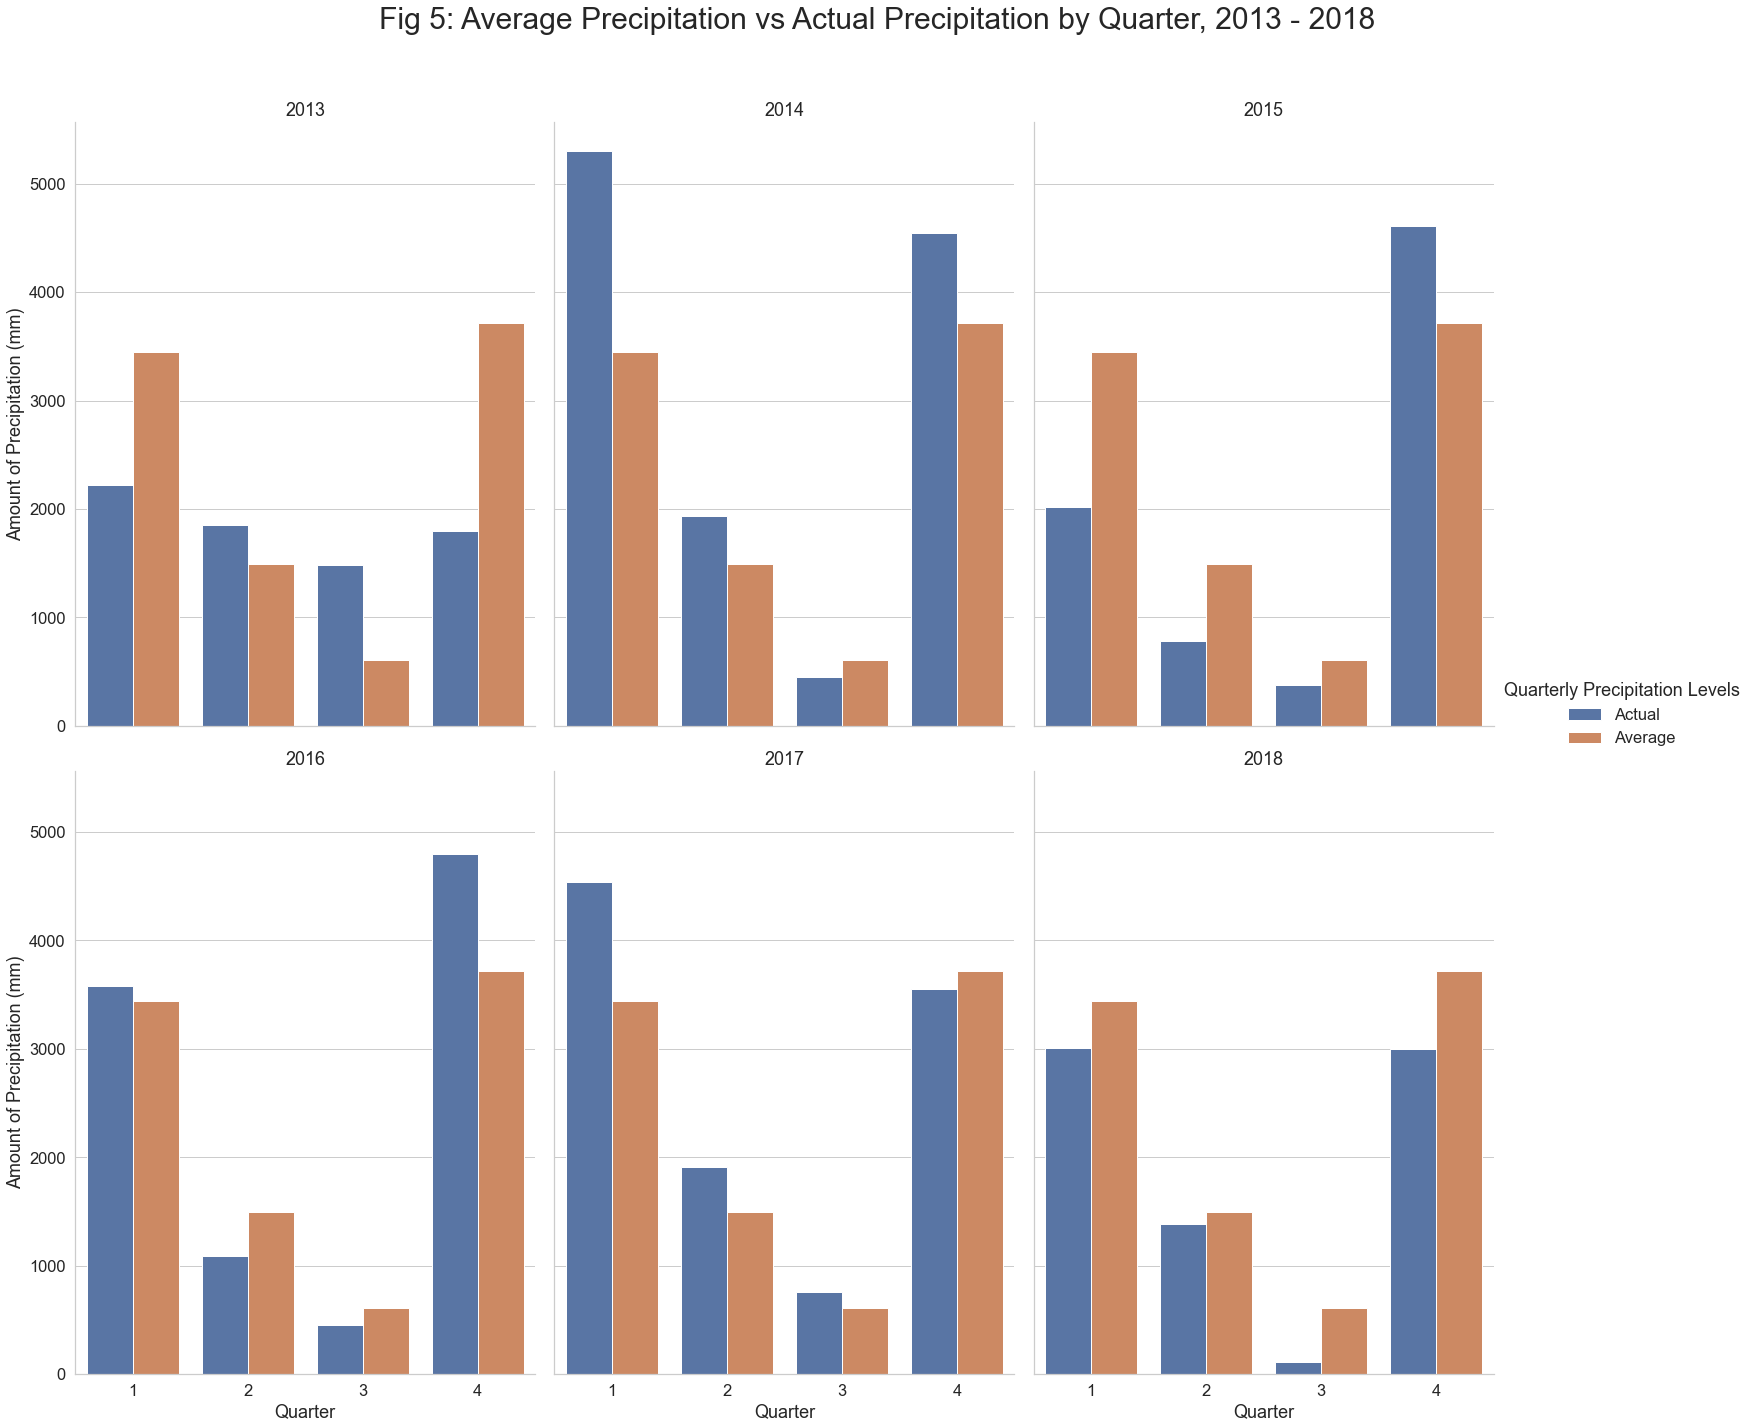

In [156]:
ax.fig.set_size_inches(15,15)

ax = sns.catplot(x="Quarter", y="Amount of Precipitation (mm)",
                hue="variable", col="year",
                data=melt_df, kind="bar",
                height=10, aspect=.7, col_wrap = 3);

#set voerall title
ax.fig.subplots_adjust(top=.9)
ax.fig.suptitle('Fig 5: Average Precipitation vs Actual Precipitation by Quarter, 2013 - 2018', fontsize=30)

ax.set_titles(row_template = '{row_name}', col_template = '{col_name}')

# hue title
new_title = 'Quarterly Precipitation Levels'
ax._legend.set_title(new_title)
# replace labels
new_labels = ['Actual', 'Average']
for t, l in zip(ax._legend.texts, new_labels): t.set_text(l)

In [157]:
ax.savefig('rainfall.png')

In [ ]:
df.YEAR.value_counts()

In [ ]:
df['heavyrain_q1'] = np.where((df['YEAR']==2012)|(df['YEAR']==2014)|(df['YEAR']==2016)|(df['YEAR']==2017), 1,0)
df['heavyrain_q2'] = np.where((df['YEAR']==2012)|(df['YEAR']==2013)|(df['YEAR']==2014)|(df['YEAR']==2017), 1,0)

In [ ]:
rain_year = temp_df.groupby('quarter_yr')[['precipitation_mm']].agg(np.sum)
rain_year = rain_year.loc[(rain_year.index>'2010Q4')&(rain_year.index<'2018Q4')]
rain_year.plot()


In [ ]:
temp_df = temp_df.loc[(temp_df['date']>date)]

temp_df['temp_avg_f'] = temp_df['temp_avg_c']*1.8 + 32

In [ ]:
temp_df = temp_df.pivot(index=["date"], columns=["id"],values="temp_avg_f")

In [ ]:
temp_merge = df[['Date','temp_f']].copy()

In [ ]:
temp_merge = temp_merge.merge(temp_df, left_on='Date',right_on=temp_df.index,how='left')
temp_merge.rename(columns={'USS0021E07S':'station_1','USS0022E07S':'station_2',
                          'USS0022E10S':'station_3','USS0022E11S':'station_4'},
                 inplace=True)

In [ ]:
# n is enumerate, m is range
for n,m in enumerate(range(2,6)):
    temp_merge['station_diff'+str(n)]= temp_merge['temp_f'] - temp_merge.iloc[:,m]

In [ ]:
fig, axs = plt.subplots(nrows=2,ncols=2,sharex=True,sharey=True,figsize=(10,8))
axs[0,0].plot(temp_merge.iloc[:,0],temp_merge.iloc[:,6],'.')
axs[0,0].set_title('Station 1 Difference')
axs[0,1].plot(temp_merge.iloc[:,0],temp_merge.iloc[:,7],'.')
axs[0,1].set_title('Station 2 Difference')
axs[1,0].plot(temp_merge.iloc[:,0],temp_merge.iloc[:,8],'.')
axs[1,0].set_title('Station 3 Difference')
axs[1,1].plot(temp_merge.iloc[:,0],temp_merge.iloc[:,9],'.')
axs[1,1].set_title('Station 4 Difference');

Based on what the data shows for reach one of the weather stations, they systematically underestimate the temperatures taken, but this was likely to occur due to the nature of the GHCN data generating process. The average temperatures measured from those stations from the average temperatures from the minimum and maximums. The temperatures taken during these observations of the pollinator dataset can vary anywhere from morning to high noon in the summertime. Therefore, using this variable as a predictor for temperatures one those particular days would be ineffective. 

The decision, then is to simply drop the missing values for days in which we are missing temperature from the data, and base our model on the other parameters that we developed to train our model. 

# Data Modeling and Inferences

For datasets not mentioned above, you are welcome to continue building machine learning model(s). Otherwise, we will be placing more emphasis on the inference part instead.

    Here are a few components your notebook must address:
        What type of machine learning problem are you investigating?

We are performing supervised machine learning to predict whether temperature and other weather patterns affect the number of interactions between plant pollinators (E.g. Bugs) and flowers. 

        What model do you plan on using and why?
We plan on using a simple linear regression to predict how temperature, sun, and wind would affect pollinator interactions. 

        Does your model require hyperparameter tuning? If so, how do you approach it?
        
No it does not. 

        How do you engineer the features for your model? What are the rationales behind selecting these features?

The features we create are the following: 

1. wind_dv: We selected the wind variable to generate a dummy that shows whether or not the day was windy. The logic behind utilizing this variable is that if it is a windy day, then you would observe lower number of pollinator interactions because the wind would blow them away from the flowers and travel would be more difficult for them 

2. sunny_dv: Each one of the descriptors for the day provide information such as if it was cloudy, partly cloudy, if the area was in the shade, or if it was bright and sunny. Based on this information, we chose to create a dummy variable for if it was sunny = 1, all else =0. Our understanding of this was that if it was sunny, then that would generate higher volumes of flowers blossoming, which would lead to more pollinators being able to go out and pollinate. 

3. temp_f: The observed temperature in fahrenheit on the day that the samples were collected. We assume that there would be higher amounts of pollinator interactions on warmer days because this implies that there would be more sunlight, but because it is in a forest, there are many variables that would dictate the temperature within a given meadow. 

4. WATCH (Phenological Periods): Phenological periods are, essentially, nature's calendar. These phenological periods are the states when the plant is growing stamen, buds begin to show, flowering, etc. We want to see which point for these measures sees the highest increase in pollinator activity. 

        How do you perform cross validation on your model?

Our group utilizes a k-fold technique that splits our training data into four smaller training sets and finds the validation error within each smaller training set. 

        What loss metrics are you using to evaluate your model?


        From a bias-variance tradeoff standpoint, how do you assess the performance of your model? How do you check if it is overfitting?
        How would you improve your model based on the outcome?


In [ ]:
df.columns

In [ ]:
df['mulcol_phen'] = np.sum(df.iloc[:,33:41],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
np.random.seed(42)

df['bias']=1

# Create a design matrix with all of our weather variables 
des_mat = df[['bias','temp_f','sunny_dv','wind_dv','heavyrain_q1','heavyrain_q2','phen_pt5', 'phen_1', 'phen_2',
       'phen_3', 'phen_4', 'phen_5', 'phen_6', 'phen_7', 'NO_INT']].copy()

In [ ]:
des_mat.dropna(inplace=True)

# drop high number of interactions data
des_mat.drop(des_mat.loc[(des_mat['NO_INT']>=200)].index,inplace=True)
# drop high temperature days
des_mat.drop(des_mat.loc[des_mat['temp_f']>=110].index,inplace=True)

X = des_mat.drop('NO_INT',axis=1)
Y = pd.Series(des_mat['NO_INT'])

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.15)

In [ ]:
import sklearn.linear_model as lm

linear_model = lm.LinearRegression()

# Fit your linear model
linear_model.fit(X_train,Y_train)

# Predict interactions on the test set
Y_pred = linear_model.predict(X_test)

# Plot predicted vs true interactions
plt.scatter(Y_test, Y_pred, alpha=0.5)
plt.xlabel("Interactions")
plt.ylabel("Predicted Interaction")
plt.title("Interactions vs Predicted Interactions");

In [ ]:
linear_model.coef_

In [ ]:
mod = sm.OLS(Y, X)
res = mod.fit()
print(res.summary()) 

In [ ]:
def ase(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The absolute error between the prediction and the groudtruth
    """
    return np.mean(np.absolute((actual_y-predicted_y)))

train_error = ase(Y_train,linear_model.predict(X_train))
print("Training ASE:", train_error)

In [ ]:
def rmse(actual_y, predicted_y):
    """
    Args:
        predicted_y: an array of the prediction from the model
        actual_y: an array of the groudtruth label
        
    Returns:
        The root mean square error between the prediction and the groudtruth
    """
    return np.sqrt(np.mean((actual_y-predicted_y)**2))

train_error = rmse(Y_train,linear_model.predict(X_train))
print("Training RMSE:", train_error)


In [ ]:
from sklearn.model_selection import KFold

def compute_CV_error_rmse(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx,:] , X_train.iloc[valid_idx,:]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx] , Y_train.iloc[valid_idx]

        # Fit the model on the training split
        linear_model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = rmse(split_Y_valid, linear_model.predict(split_X_valid))


        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [ ]:
def compute_CV_error_mase(model, X_train, Y_train):
    '''
    Split the training data into 4 subsets.
    For each subset, 
        fit a model holding out that subset
        compute the MSE on that subset (the validation set)

    Args:
        model: an sklearn model with fit and predict functions 
        X_train (data_frame): Training data
        Y_train (data_frame): Label 

    Return:
        the average validation MSE for the 4 splits.
    '''
    kf = KFold(n_splits=4)
    validation_errors = []
    
    for train_idx, valid_idx in kf.split(X_train):
        # split the data
        split_X_train, split_X_valid = X_train.iloc[train_idx,:] , X_train.iloc[valid_idx,:]
        split_Y_train, split_Y_valid = Y_train.iloc[train_idx] , Y_train.iloc[valid_idx]

        # Fit the model on the training split
        linear_model.fit(split_X_train, split_Y_train)
        
        # Compute the RMSE on the validation split
        error = ase(split_Y_valid, linear_model.predict(split_X_valid))


        validation_errors.append(error)
        
    return np.mean(validation_errors)

In [ ]:
errors = []

range_of_num_features = range(1, X_train.shape[1] + 1)
for N in range_of_num_features:
    print(f"Trying first {N} features")
    model = lm.LinearRegression()
    
    # compute the cross validation error
    error = compute_CV_error_rmse(model,X_train.iloc[:,0:N],Y_train)
    
    print("\tRMSE:", error)
    errors.append(error)

best_num_features = np.where(errors==np.min(errors))[0][0]+1
best_err = np.min(errors)

print(f"Best choice, use the first {best_num_features} features")

In [ ]:
errors = []

range_of_num_features = range(1, X_train.shape[1] + 1)
for N in range_of_num_features:
    print(f"Trying first {N} features")
    model = lm.LinearRegression()
    
    # compute the cross validation error
    error = compute_CV_error_mase(model,X_train.iloc[:,0:N],Y_train)
    
    print("\tMASE:", error)
    errors.append(error)

best_num_features = np.where(errors==np.min(errors))[0][0]+1
best_err = np.min(errors)

print(f"Best choice, use the first {best_num_features} features")

In [ ]:
train_error_vs_N = []
test_error_vs_N = []



for N in range_of_num_features:
    X_train_first_N_features = X_train.iloc[:, :N]    
    
    linear_model.fit(X_train_first_N_features, Y_train)
    train_error_overfit = rmse(Y_train, linear_model.predict(X_train_first_N_features))
    train_error_vs_N.append(train_error_overfit)
    
    X_test_first_N_features = X_test.iloc[:, :N]
    test_error_overfit = rmse(Y_test, linear_model.predict(X_test_first_N_features))    
    test_error_vs_N.append(test_error_overfit)
    
plt.figure(figsize=(10, 6))
plt.plot(range_of_num_features, train_error_vs_N)
plt.plot(range_of_num_features, test_error_vs_N)
plt.legend(["training", "test error"])
plt.title('RMSE vs Number of Features')
plt.xlabel("number of features")
plt.ylabel("RMSE");

In [ ]:
train_error_vs_N = []
test_error_vs_N = []



for N in range_of_num_features:
    X_train_first_N_features = X_train.iloc[:, :N]    
    
    linear_model.fit(X_train_first_N_features, Y_train)
    train_error_overfit = ase(Y_train, linear_model.predict(X_train_first_N_features))
    train_error_vs_N.append(train_error_overfit)
    
    X_test_first_N_features = X_test.iloc[:, :N]
    test_error_overfit = ase(Y_test, linear_model.predict(X_test_first_N_features))    
    test_error_vs_N.append(test_error_overfit)
    
plt.figure(figsize=(10, 6))
plt.plot(range_of_num_features, train_error_vs_N)
plt.plot(range_of_num_features, test_error_vs_N)
plt.legend(["training", "test error"])
plt.title('MASE vs Number of Features')
plt.xlabel("number of features")
plt.ylabel("MASE");

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(np.arange(len(X_test)), Y_test - linear_model.predict(X_test.iloc[:, :13]))
plt.xlabel('i')
plt.ylabel('residual (true y - estimated y)')
plt.title("Residual of prediction for i'th interaction")
plt.axhline(y = 0, color='r');